## dash 설치

```
pip install dash
pip install jupyter-dash # Dash development within jupyter notebook environment
```

In [5]:
%%writefile '01start.py'
#!/usr/bin/python
# -*- coding: <encoding name> -*-

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

df = px.data.iris() # iris data 불러오기
# plotly를 이용한 산점도
fig = px.scatter(df, x="sepal_length", y="sepal_width", 
                  color="species")

app = Dash(__name__)
# app layout: html과 dcc 모듈을 이용
app.layout = html.Div(children=[
    # Dash HTML Components module로 HTML 작성 
    html.H1(children='첫번째 Dash 화면'),
    html.Div(children='''
        대시를 이용하여 웹어플리케이션 작성 연습...
    '''),
    # dash.core.component(dcc)의 그래프컴포넌트로 plotly 그래프 렌더링
    dcc.Graph(
        id='graph1',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
    #app.run_server(debug=False, host='0.0.0.0', port=8888)

Overwriting 01start.py


In [ ]:
# ! python 01start.py

^C


dash는 hot-reload를 지원한다!

코드에 변경이 있을 때 실행을 중지시키고 다시 실행해야하는 수고없이 알아서 리로드를 해준다.
 - 앞의 01start.py 를 편집기에서 열고 명령행에서 실행한다.
 - 편집기 코드를 변경해 보자.

터미널에서 실행:

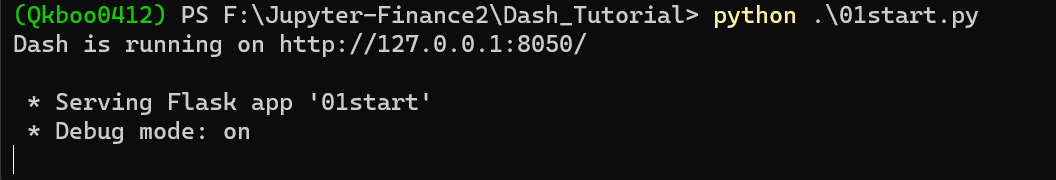

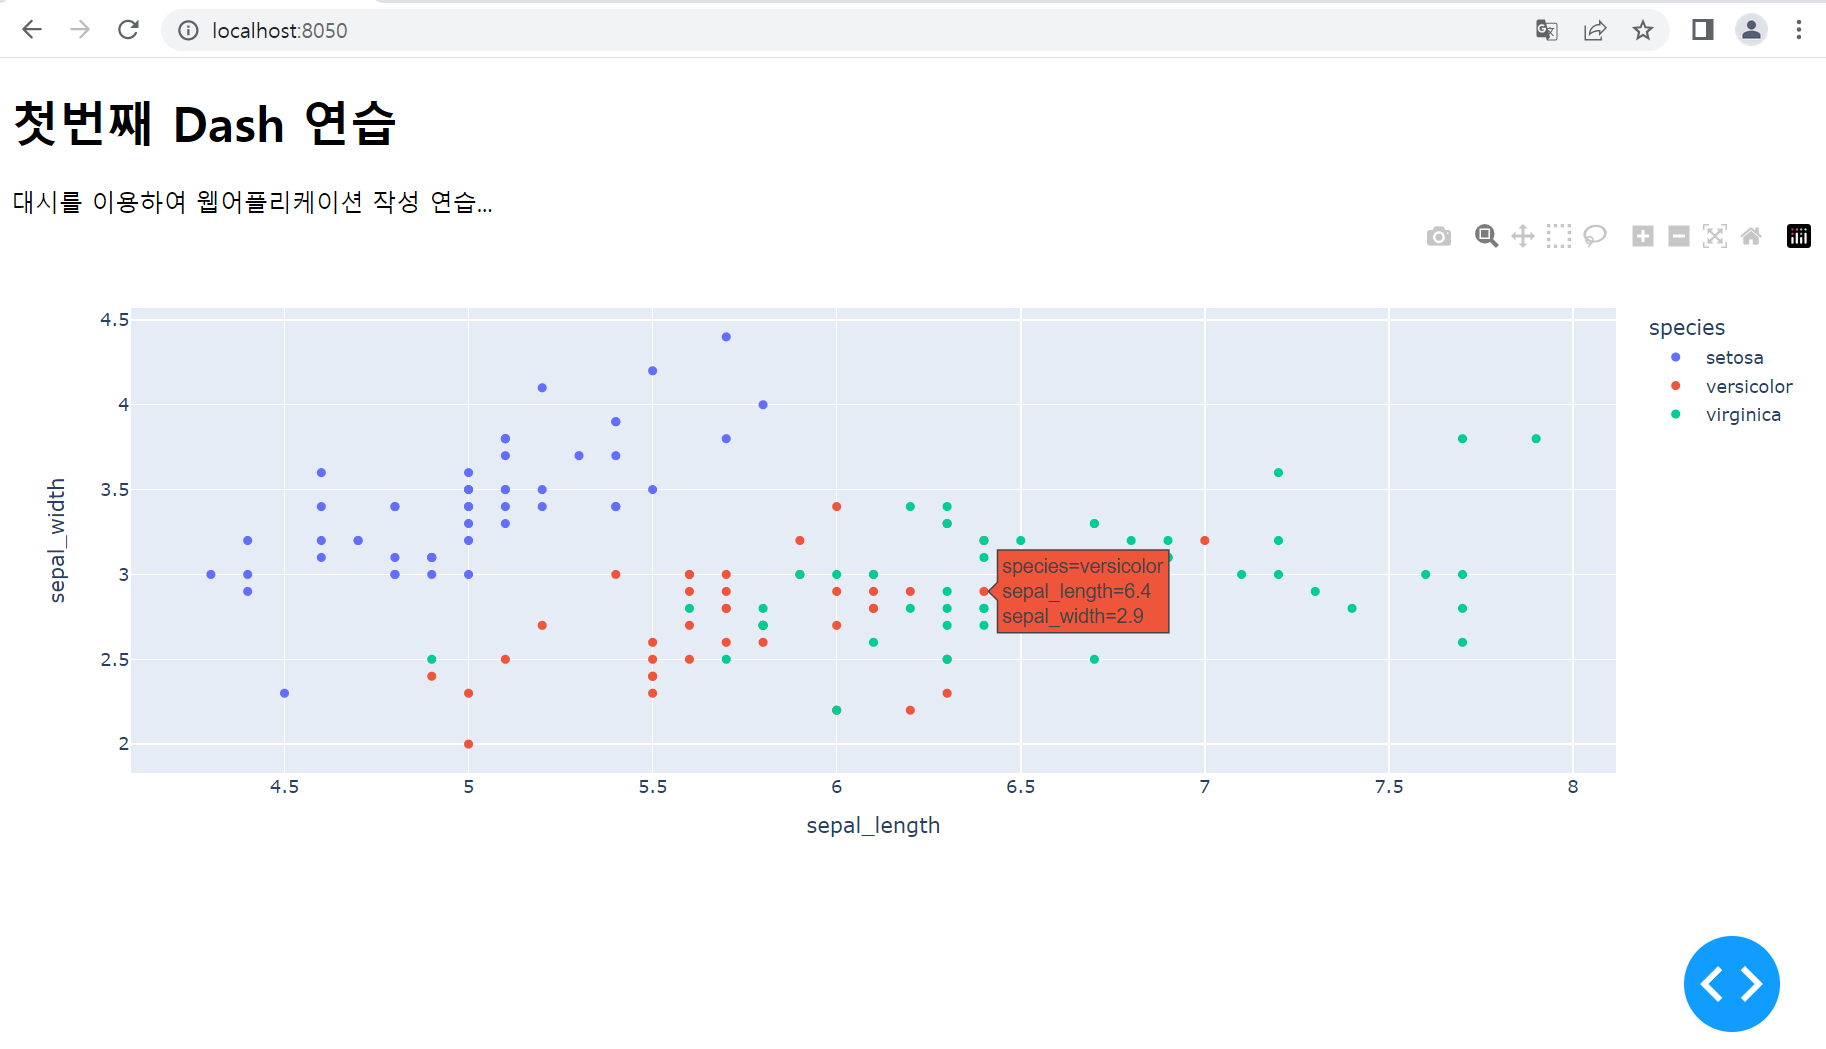

# Jupyter with dash

https://dash.plotly.com/workspaces/using-dash-in-jupyter-and-workspaces

In [1]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output

In [2]:
# load data
df = px.data.tips()

In [6]:
# Build app in DASH
app = Dash(__name__)
app.layout = html.Div([
    html.H1('Hello JupyterDash'),
    dcc.Graph(id='graph')
])

In [7]:
# Build app in JupyterDash
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1('Hello JupyterDash'),
    dcc.Graph(id='graph')
])

In [9]:
# Serviing Dash app

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


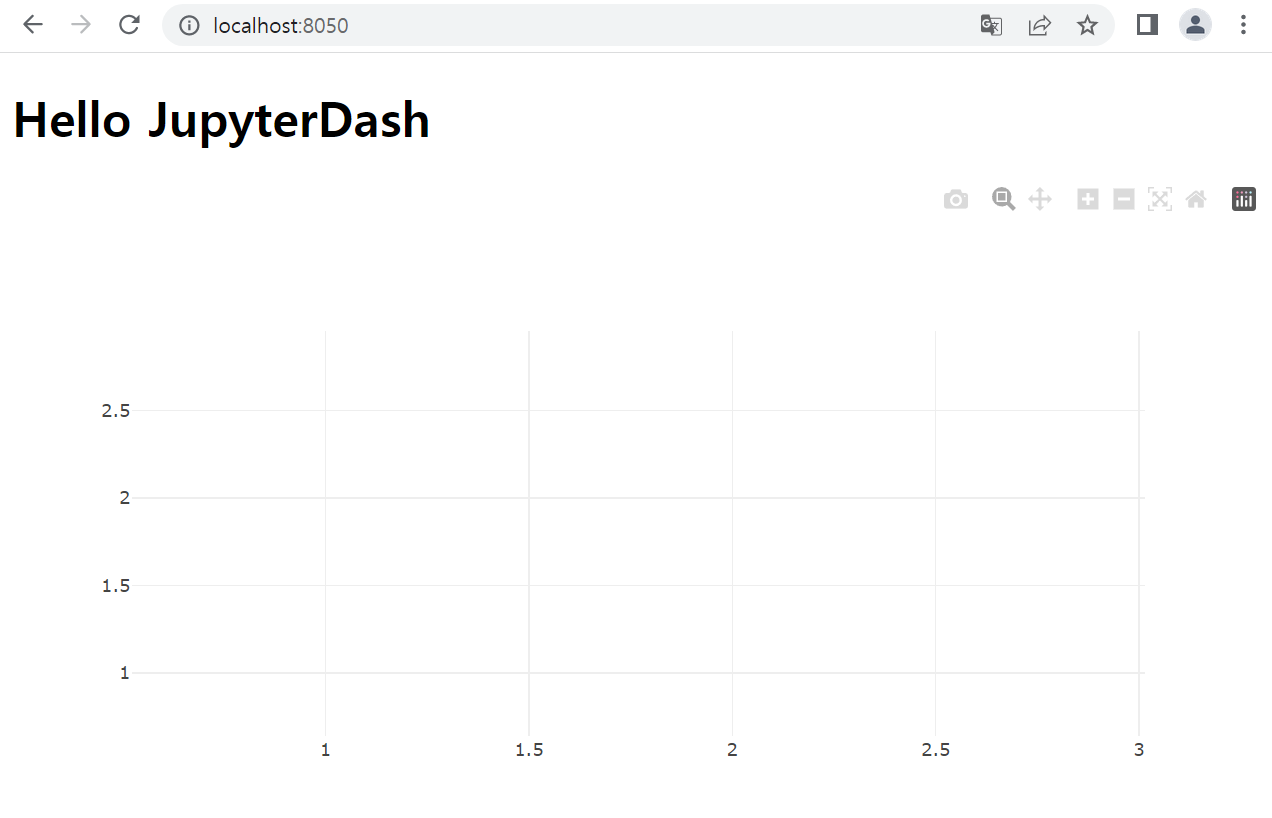

## View Inline

You can also view the running app directly in a Jupyter Notebook output cell by setting mode="inline" on run_server


```sh
if __name__ == '__main__':
    app.run_server(mode="inline")
```

In [11]:
import pandas as pd

df = px.data.iris() # iris data 불러오기
# plotly를 이용한 산점도
fig = px.scatter(df, x="sepal_length", y="sepal_width", 
                  color="species")

app = JupyterDash(__name__)
# app layout: html과 dcc 모듈을 이용
app.layout = html.Div(children=[
    # Dash HTML Components module로 HTML 작성 
    html.H1(children='첫번째 Dash 연습'),
    html.Div(children='''
        대시를 이용하여 웹어플리케이션 작성 연습...
    '''),
    # dash.core.component(dcc)의 그래프컴포넌트로 plotly 그래프 렌더링
    dcc.Graph(
        id='graph1',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(mode='inline', debug=True)

Dash is running on http://127.0.0.1:8050/



## Deploying a Dash App inside Jupyter

To deploy your Dash app:

Add the following launch.sh and Procfile files to your project. The launch.sh script converts your notebook to a .py file to deploy and the Procfile tells Dash Enterprise which processes to run on startup. Be sure to create the Procfile without a file extension.

launch.sh
```
#!/bin/bash

# Name of notebook to deploy (excluding .ipynb extension)
<name>=app

# Convert notebook to py script
jupyter nbconvert --to script $NAME.ipynb

# Depending on notebook metadata, command above may output a .txt file
# If so, change extension to .py
if [ -f $NAME.txt ]; then
   mv $NAME.txt $NAME.py
fi
```

where <name> is the name of your Jupyter notebook, excluding the .ipynb extension.

Procfile

web: gunicorn <name>:server --workers 2
where <name> is the name of your Jupyter notebook, excluding the .ipynb extension.

In your notebook, define the server variable for Gunicorn:

server = app.server
Create a requirements.txt file for your app dependencies with pip freeze > requirements.txt; then go in requirements.txt and add nbconvert and gunicorn.

Run the launch.sh script in the workspace terminal:

./launch.sh
If you get an error "setuidgid: fatal: unable to run ./launch.sh: access denied", then make the script executable and run it again:

chmod +x launch.sh
Select Deploy.

Note: You'll need to run the launch.sh script any time you make changes in the Jupyter Notebook and want to deploy those changes.